# PRACTICA GUIADA: Regresión logística con `statsmodels`

## 1. Introducción

En este caso, estamos interesados en entender cómo variables como los resultados en los tests GPE(Graduate Record Exam), el GPA (Grade Point Average - promedio en el grado) y el prestigio de la universidad a la que asistió el aspirante durante sus "undergraduate studies" afectan las probabilidades de admisión a la "graduate school". 

Para ello se construye una muestra de 400 pedidos de ingreso a 10 universidades y se registra la información correspondiente. 

La variable dependiente es el resultado final de la admisión: si el estudiante fue admitido ($admit=1$) o no ($admit=0$).

Para más información sobre el dataset pueden ingresar  <a href='https://stats.idre.ucla.edu/r/dae/logit-regression/'> aquí </a>

## 2. Regresión logística con `statsmodels`

Importamos los paquetes a utilizar el dataset y realizamos un primer análisis descriptivo del mismo.

In [1]:
%pylab inline
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('../Data/binary.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Cambiamos la columna rank a prestige, para no chocar con el método DataFrame.rank, prestige 1 es superior, lo cual quiere decir que el aspirante hizo sus "undergraduate studies" en institución de mayor prestigio.

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


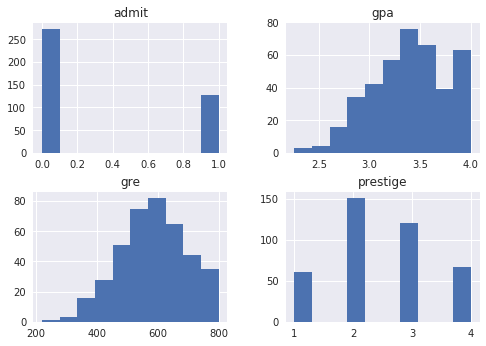

In [3]:
df.hist();
df.describe()

Realicemos, ahora, un análisis gráfico exploratorio de los datos:

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


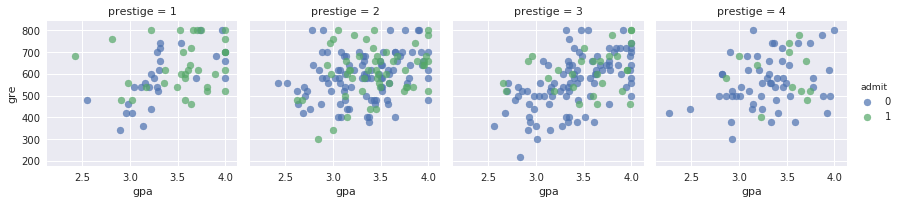

In [4]:
g = sns.FacetGrid(df, col="prestige", hue="admit")
g.map(plt.scatter, "gpa", "gre", alpha=.7)
g.add_legend();

Para ver de forma un poco más clara, podemos hacer histogramas agrupando según el valor de *admit*. Podemos ver que hay ligeras modificaciones en la media que podrían predecir el valore de *admit*.

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5945: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


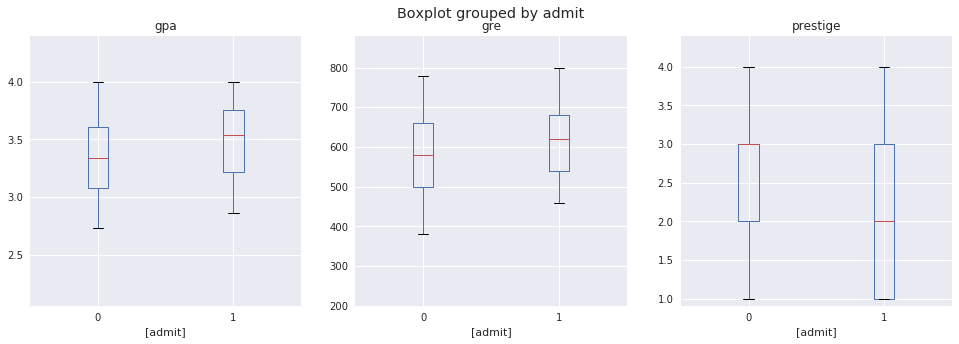

In [5]:
fig, ax_new = plt.subplots(1,3, sharey=False,figsize=(16,5))
axes_ = df.boxplot(by='admit',ax=ax_new,return_type='axes',whis=[5,95]);
for ax,col in zip(axes_,['gpa','gre','prestige']):
    ax.set_ylim(df[col].min()/1.1,df[col].max()*1.1)

Realicemos un tabla de contingencia de los 400 casos, tabulados según presitigio (`prestige`) y su carácter de admitidos o no (`admin`)

In [6]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'], normalize=True)

prestige,1,2,3,4
admit,,,,
0,0.0700,0.2425,0.2325,0.1375
1,0.0825,0.1350,0.0700,0.0300


Ahora, transformemos `prestige` en dummie 

In [7]:
dummy_ranks = pd.get_dummies(df["prestige"], prefix="prestige")
data = pd.concat([df,dummy_ranks],axis=1)
data["intercept"] = 1.0
data.head()

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,3,0,0,1,0,1.0
1,1,660,3.67,3,0,0,1,0,1.0
2,1,800,4.00,1,1,0,0,0,1.0
3,1,640,3.19,4,0,0,0,1,1.0
4,0,520,2.93,4,0,0,0,1,1.0


#### Entrenemos el modelo con gre, gpa y prestige categorico / dummy 
**Se descarta prestige_1 para evitar la [multicolinealidad](https://en.wikipedia.org/wiki/Multicollinearity)**

In [8]:
train_cols = ['gre','gpa','prestige_2','prestige_3','prestige_4','intercept']
logit = sm.Logit(data["admit"], data[train_cols])
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: admit            AIC:              470.5175  
Date:               2017-10-03 22:21 BIC:              494.4663  
No. Observations:   400              Log-Likelihood:   -229.26   
Df Model:           5                LL-Null:          -249.99   
Df Residuals:       394              LLR p-value:      7.5782e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
gre            0.0023    0.0011   2.0699  0.0385   0.0001   0.0044
gpa            0.8040    0.3318   2.4231  0.0154   0.1537   1.

Veamos, ahora, la matriz de confusión

In [9]:
print('Clasificados como Admit 0:','Bien',result.pred_table()[0][0],'Mal',result.pred_table()[0][1])
print('Clasificados como Admit 1:','Mal',result.pred_table()[1][0],'Bien',result.pred_table()[1][1])

Clasificados como Admit 0: Bien 254.0 Mal 19.0
Clasificados como Admit 1: Mal 97.0 Bien 30.0


#### Entrenemos el modelo con gre, gpa y prestige original 

In [10]:
train_cols = ['gre','gpa','prestige','intercept']
logit = sm.Logit(data["admit"], data[train_cols])
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.081     
Dependent Variable: admit            AIC:              467.4418  
Date:               2017-10-03 22:26 BIC:              483.4076  
No. Observations:   400              Log-Likelihood:   -229.72   
Df Model:           3                LL-Null:          -249.99   
Df Residuals:       396              LLR p-value:      8.2071e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
gre            0.0023    0.0011   2.1010  0.0356   0.0002   0.0044
gpa            0.7770    0.3275   2.3727  0.0177   0.1352   1.

In [11]:
print('Clasificados como Admit 0:','Bien',result.pred_table()[0][0],'Mal',result.pred_table()[0][1])
print('Clasificados como Admit 1:','Mal',result.pred_table()[1][0],'Bien',result.pred_table()[1][1])

Clasificados como Admit 0: Bien 253.0 Mal 20.0
Clasificados como Admit 1: Mal 98.0 Bien 29.0


+ ¿Qué pueden decir de ambos modelos?
+ ¿Cuál funciona mejor?

## Ejercicio: regresión logística con `sklearn`

Hasta aquí hemos usado la biblioteca `statsmodels` para generar las estimaciones correspondientes. Ahora repliquen el modelo anterior usando sklearn. 

El objetivo es que puedan 

1. identificar dentro de la documentación de `scikit-learn` cuál es el estimador que corresponde al problema en cuestión
2. consulten la documentación del estimador correspondiente
3. repliquen el úlitmo modelo estimado en el paso anterior
4. comparen los resultados

In [76]:
from sklearn.linear_model import LogisticRegression

X = data[['gre','gpa','prestige_2','prestige_3','prestige_4']]
y = data['admit']
y = np.ravel(y) # flatten y into a 1-D array

# instantiate a logistic regression model, and fit with X and y
lr = LogisticRegression(C=1e10)
lr.fit(X, y)

# check the accuracy on the training set
lr.score(X, y)

0.70999999999999996

In [77]:
print(['gre','gpa','prestige_2','prestige_3','prestige_4'])
lr.coef_

['gre', 'gpa', 'prestige_2', 'prestige_3', 'prestige_4']


array([[ 0.00225514,  0.8017655 , -0.67456784, -1.33708167, -1.5502974 ]])

In [78]:
lr.intercept_

array([-3.97765654])

In [79]:
predictions = lr.predict(X)

In [80]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0,

In [81]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression(C=1e10)
model2.fit(X_train, y_train)

predicted = model2.predict(X_test)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]


In [82]:
from sklearn import metrics
probs = model2.predict_proba(X_test)
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.725
0.681643132221


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[77,  5],
       [28, 10]])

In [84]:
1e10

10000000000.0